<img src="https://avatars.githubusercontent.com/u/74911464?s=200&v=4"
     alt="OpenEO Platform logo"
     style="float: left; margin-right: 10px;" />
# OpenEO Platform - User Story 3

## On-demand processing of Sentinel-1 data
 - ARD compliant
 - With custom parametrization

## On-demand processing of Sentinel-1 data
Compare the data given the different options: ARD metadata, terrain correction?, sigma, gamma
- Visualize the metadata
- Sigma to Gamma Ratio
- Scaling from linear to decibel?

OpenEO conversion to dB in the process graph.
- Comparison in Bolzano area
- Show that changing a parameter the output changes.
- Show sigma to gamma ratio as another raster.

In [99]:
from eo_utils import *

## Step 1 -  Area of Interest selection
### Run the next cell, click on the rectangle button and then draw the area over the map like in the following example image
<img src="https://github.com/openEOPlatform/SRR1_notebooks/raw/main/data/images/selection_bbox.jpg"
     alt="rectangle_selection"
     style="float: left; margin-right: 10px;" />

In [100]:
center = [46.49, 11.35]
zoom = 12

eoMap = openeoMap(center,zoom)
eoMap.map

Map(center=[46.49, 11.35], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

Get the bounding box from the previous map.

In [101]:
bbox = eoMap.getBbox()
print('west',bbox[0],'\neast',bbox[2],'\nsouth',bbox[1],'\nnorth',bbox[3])

west 11.264045 
east 11.399991 
south 46.4566 
north 46.523966


<img src="https://github.com/openEOPlatform/SRR1_notebooks/raw/main/data/images/Sentinel_1.jpg"
     alt="Sentinel-1"
     style="float: left; margin-right: 10px; width:100px" />
## Step 1 - openEO graph creation for Sentinel-1 @VITO

1. Open the connection with VITO back-end. Please use the openeo-auth tool to configure credentials.
https://open-eo.github.io/openeo-python-client/auth.html#config-files-and-openeo-auth-helper-tool

In [102]:
vito_backend_url = "https://openeo.vito.be"
vito_conn = openeo.connect(vito_backend_url).authenticate_basic()

2. Define range of interest in time from Sentinel-1

In [103]:
collection      = 'SENTINEL1_GRD'
spatial_extent  = {'west':bbox[0],'east':bbox[2],'south':bbox[1],'north':bbox[3],'crs':'EPSG:4326'}
temporal_extent = ["2021-01-01", "2021-01-10"]
bands           = ["VV","VH"]

s1 = vito_conn.load_collection(collection,spatial_extent=spatial_extent,bands=bands,temporal_extent=temporal_extent)

3. Apply the ARD compliant SAR processing.

In [104]:
#skip evaluating the rdd, this is a small performance improvement, only at VITO
s1bs = s1bs.process("discard_result", arguments={"data": s1bs})
s1bs = s1.ard_normalized_radar_backscatter(elevation_model="COPERNICUS_30")

4. Save process as final step, here we use NetCDF as output format.

In [105]:
s1bs_netcdf = s1bs.save_result(format="NetCDF")

5. Visualize the openEO process graph.

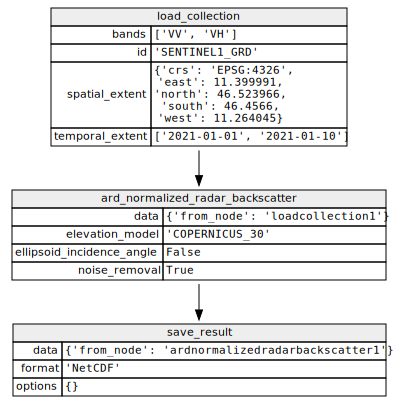

In [106]:
s1bs_netcdf.to_graphviz()

6. Now we will create a batch job and start it. More info about batch jobs can be found here:

    https://openeo.org/documentation/1.0/glossary.html#data-processing-modes

    https://open-eo.github.io/openeo-python-client/batch_jobs.html

In [107]:
job_vito = vito_conn.create_job(s1bs_netcdf.graph)
job_id_vito = job_vito.job_id
if job_id_vito:
    print("Batch job created with id: ",job_id_vito)
    job_vito.start_job()
else:
    print("Error! Job ID is None")

Batch job created with id:  1c5f0d1a-e60f-43c2-9267-7294aa873dae


If our area of interest is small, we can also do a direct request, but this will not return the CARD4L json metadata. Note that this step automatically adds the save_result process at the end based on the output format we choose.

In [ ]:
#s1bs.download("out.nc",format="NetCDF")

We can get a description of the job and check its status.

In [119]:
job_vito = vito_conn.job(job_id_vito)
job_description = job_vito.describe_job()
print("Batch job with id: ",job_id_vito, ' is ',job_description['status'])

Batch job with id:  1c5f0d1a-e60f-43c2-9267-7294aa873dae  is  queued


In [10]:
#skip evaluating the rdd, this is a small performance improvement
# s1bs = s1bs.process("discard_result", arguments={"data": s1bs})
job = s1bs.execute_batch(out_format="NetCDF")
#s1bs.download("out",format="NetCDF")

0:00:00.000001 Job 'a45af884-1007-4bdc-a7cf-d3aa8f21e7b9': queued (progress N/A)
0:00:06.040218 Job 'a45af884-1007-4bdc-a7cf-d3aa8f21e7b9': queued (progress N/A)
0:00:12.944469 Job 'a45af884-1007-4bdc-a7cf-d3aa8f21e7b9': queued (progress N/A)
0:00:22.743871 Job 'a45af884-1007-4bdc-a7cf-d3aa8f21e7b9': queued (progress N/A)
0:00:33.382119 Job 'a45af884-1007-4bdc-a7cf-d3aa8f21e7b9': queued (progress N/A)
0:00:46.314688 Job 'a45af884-1007-4bdc-a7cf-d3aa8f21e7b9': queued (progress N/A)
0:01:02.280714 Job 'a45af884-1007-4bdc-a7cf-d3aa8f21e7b9': queued (progress N/A)
0:01:22.034116 Job 'a45af884-1007-4bdc-a7cf-d3aa8f21e7b9': queued (progress N/A)
0:01:46.498273 Job 'a45af884-1007-4bdc-a7cf-d3aa8f21e7b9': queued (progress N/A)
0:02:16.934858 Job 'a45af884-1007-4bdc-a7cf-d3aa8f21e7b9': queued (progress N/A)
0:02:55.849167 Job 'a45af884-1007-4bdc-a7cf-d3aa8f21e7b9': queued (progress N/A)
0:03:43.074785 Job 'a45af884-1007-4bdc-a7cf-d3aa8f21e7b9': queued (progress N/A)
0:07:00.203017 Job 'a45af884

If any error happens, we can read the log in this way:

In [112]:
log = job_vito.logs()
log

[]

In [23]:
results = job_vito.get_results()
results

<JobResults for job 'a45af884-1007-4bdc-a7cf-d3aa8f21e7b9'>

In [120]:
sar_sigma = xr.open_dataset('out.nc')
sar_sigma

<xarray.Dataset>
Dimensions:                (t: 6, x: 1026, y: 729)
Coordinates:
  * t                      (t) datetime64[ns] 2021-01-01 ... 2021-01-09
  * x                      (x) float64 1.254e+06 1.254e+06 ... 1.274e+06
  * y                      (y) float64 5.853e+06 5.853e+06 ... 5.866e+06
Data variables:
    VH                     (t, y, x) float32 ...
    VV                     (t, y, x) float32 ...
    local_incidence_angle  (t, y, x) float32 ...
    mask                   (t, y, x) float32 ...
Attributes:
    nodata:   0.0
    crs:      +proj=merc +a=6378137 +b=6378137 +lat_ts=0.0 +lon_0=0.0 +x_0=0....

If we don't need CARDL compliant data, we can also use the sar_backscatter process:

In [57]:
collection      = 'SENTINEL1_GRD'
spatial_extent  = {'west':bbox[0],'east':bbox[2],'south':bbox[1],'north':bbox[3],'crs':'EPSG:4326'}
temporal_extent = ["2021-01-01", "2021-01-05"]
bands           = ["VV","VH"]

s1 = vito_conn.load_collection(collection,spatial_extent=spatial_extent,bands=bands,temporal_extent=temporal_extent)
s1_sigma = s1.sar_backscatter(coefficient='sigma0-ellipsoid')
s1_sigma_netcdf = s1_sigma.save_result(format="NetCDF")

In [58]:
job_vito_sigma = vito_conn.create_job(s1_sigma_netcdf.graph)
job_id_vito_sigma = job_vito_sigma.job_id
if job_id_vito_sigma:
    print("Batch job created with id: ",job_id_vito_sigma)
    job_vito_sigma.start_job()
else:
    print("Error! Job ID is None")

Batch job created with id:  9526747d-c7d9-4a2e-a3db-eb016ce46386


In [113]:
job_vito_sigma = vito_conn.job(job_id_vito_sigma)
job_description = job_vito_sigma.describe_job()
print("Batch job with id: ",job_id_vito_sigma, ' is ',job_description['status'])

Batch job with id:  9526747d-c7d9-4a2e-a3db-eb016ce46386  is  finished


In [114]:
results = job_vito_sigma.get_results()
results

<JobResults for job '9526747d-c7d9-4a2e-a3db-eb016ce46386'>

In [87]:
results.download_file('vito_sigma.nc')

PosixPath('vito_sigma.nc')

In [115]:
sar_sigma = xr.open_dataset('vito_sigma.nc')
sar_sigma

<xarray.Dataset>
Dimensions:  (t: 3, x: 1419, y: 989)
Coordinates:
  * t        (t) datetime64[ns] 2021-01-01 2021-01-02 2021-01-03
  * x        (x) float64 6.725e+05 6.725e+05 6.725e+05 ... 6.866e+05 6.867e+05
  * y        (y) float64 5.146e+06 5.146e+06 5.146e+06 ... 5.156e+06 5.156e+06
Data variables:
    VH       (t, y, x) float32 ...
    VV       (t, y, x) float32 ...
Attributes:
    nodata:   0.0
    crs:      +proj=utm +zone=32 +datum=WGS84 +units=m +no_defs

Text(0.5, 1.0, 'Sigma VH')

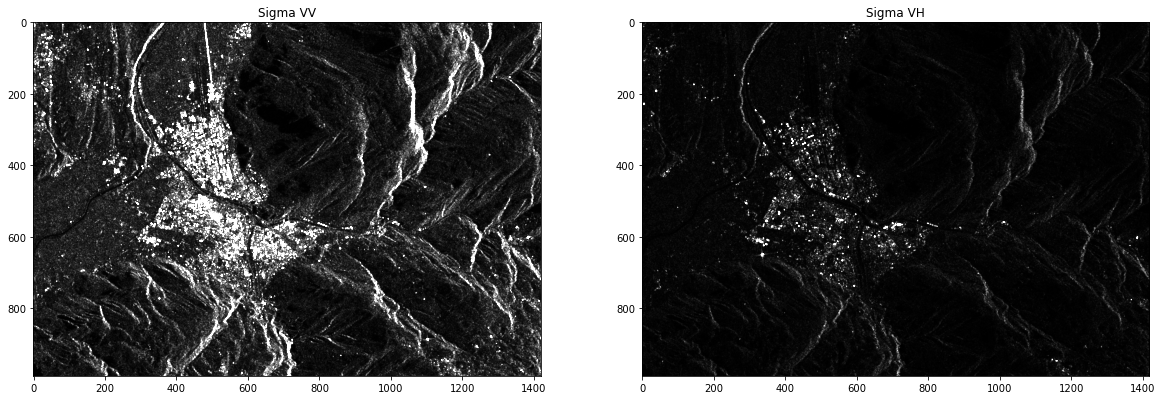

In [118]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,20))

ax1.imshow(sar_sigma.VV[0].values,cmap='Greys_r',vmin=0,vmax=0.8)
ax1.set_title('Sigma VV')
ax2.imshow(sar_sigma.VH[0].values,cmap='Greys_r',vmin=0,vmax=0.8)
ax2.set_title('Sigma VH')

### Download results
CARD4L results contain STAC metadata and the requested image. 

Here we simply download everything, for inspection.

In [ ]:
results.download_files()

The downloaded data can be opened, but these are fairly large files, making visualization more difficult.
The foreseen way of interacting with it is to use openEO to further process the dataset into a more manageable result.

In [26]:
import hvplot.xarray
sar = xr.open_rasterio('s1_rtc_02F8D2_N46E011_2021_01_02_MULTIBAND.tif')
sar

<xarray.DataArray (band: 4, y: 5000, x: 5000)>
[100000000 values with dtype=float32]
Coordinates:
  * band     (band) int64 1 2 3 4
  * y        (y) float64 47.0 47.0 47.0 47.0 47.0 ... 46.0 46.0 46.0 46.0 46.0
  * x        (x) float64 11.0 11.0 11.0 11.0 11.0 ... 12.0 12.0 12.0 12.0 12.0
Attributes:
    transform:               (0.0002, 0.0, 11.0, 0.0, -0.0002, 47.0)
    crs:                     +init=epsg:4326
    res:                     (0.0002, 0.0002)
    is_tiled:                1
    nodatavals:              (nan, nan, nan, nan)
    scales:                  (1.0, 1.0, 1.0, 1.0)
    offsets:                 (0.0, 0.0, 0.0, 0.0)
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1

In [74]:
sar = xr.open_dataset('out.nc')
sar

<xarray.Dataset>
Dimensions:                (t: 6, x: 1026, y: 729)
Coordinates:
  * t                      (t) datetime64[ns] 2021-01-01 ... 2021-01-09
  * x                      (x) float64 1.254e+06 1.254e+06 ... 1.274e+06
  * y                      (y) float64 5.853e+06 5.853e+06 ... 5.866e+06
Data variables:
    VH                     (t, y, x) float32 ...
    VV                     (t, y, x) float32 ...
    local_incidence_angle  (t, y, x) float32 ...
    mask                   (t, y, x) float32 ...
Attributes:
    nodata:   0.0
    crs:      +proj=merc +a=6378137 +b=6378137 +lat_ts=0.0 +lon_0=0.0 +x_0=0....

In [76]:
sar.VV[0]

<xarray.DataArray 'VV' (y: 729, x: 1026)>
[747954 values with dtype=float32]
Coordinates:
    t        datetime64[ns] 2021-01-01
  * x        (x) float64 1.254e+06 1.254e+06 1.254e+06 ... 1.274e+06 1.274e+06
  * y        (y) float64 5.853e+06 5.853e+06 5.853e+06 ... 5.866e+06 5.866e+06

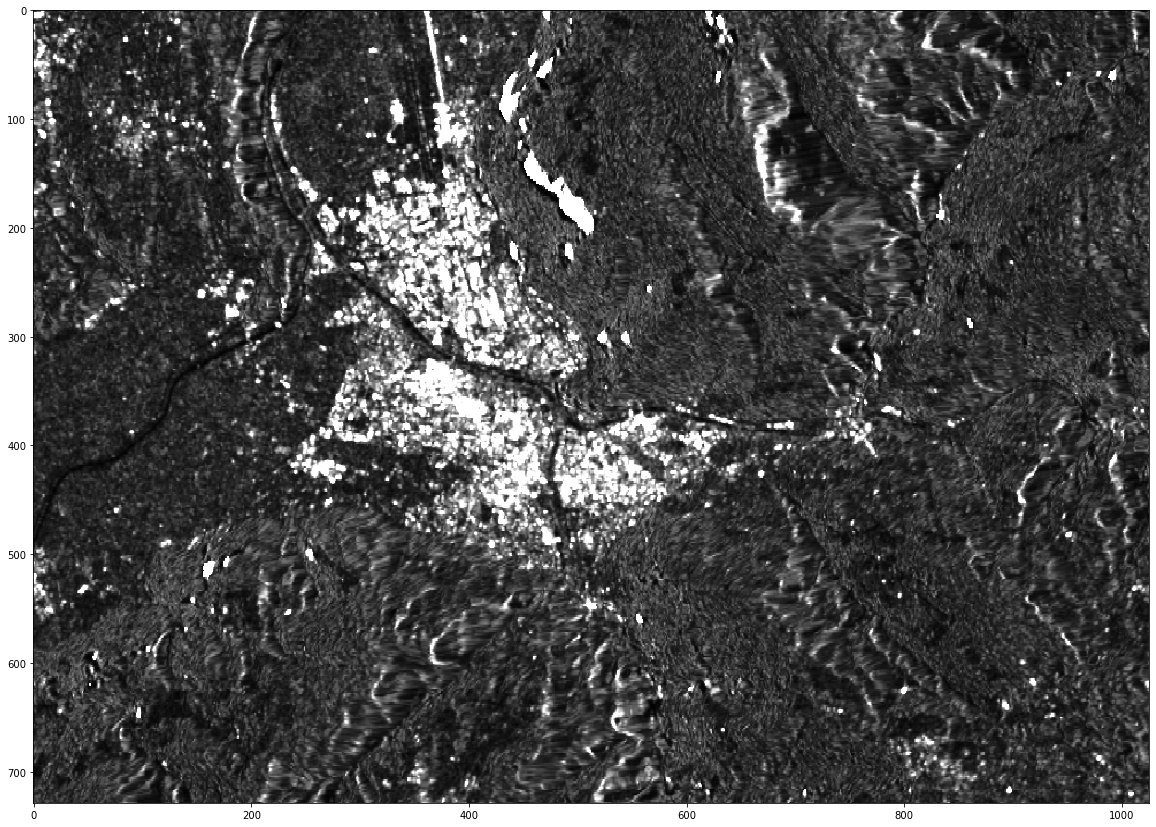

In [83]:
fig, ax1 = plt.subplots(1,1,figsize=(20,20))

ax1.imshow(sar.VV[0].values,cmap='Greys_r',vmin=0,vmax=0.8)

In [6]:
import numpy as np
(10* np.log10(sar.sel(band=2)))

<xarray.DataArray (y: 5000, x: 5000)>
array([[       nan,        nan,        nan, ..., -16.955921, -16.45497 ,
        -19.024471],
       [       nan,        nan,        nan, ..., -17.768948, -18.262924,
        -15.963539],
       [       nan,        nan,        nan, ..., -17.006554, -19.22216 ,
        -16.912462],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
    band     int64 2
  * y        (y) float64 47.0 47.0 47.0 47.0 47.0 ... 46.0 46.0 46.0 46.0 46.0
  * x        (x) float64 11.0 11.0 11.0 11.0 11.0 ... 12.0 12.0 12.0 12.0 12.0

## Timeseries comparison

Next to requesting CARD4L backscatter data on SentinelHub, we can also generate Sigma0 backscatter on CreoDIAS.

In [12]:
backend_url = "https://openeo.creo.vito.be"
con = openeo.connect(backend_url).authenticate_basic()

In [13]:
W, S = 510000, 5680000
bbox = {
    "west": W, "east": W + 256 * 10,
    "south": S, "north": S + 256 * 10,
    "crs": 32631
}

dates = ("2020-05-06T00:00:00", "2020-09-30T00:00:00")

In [14]:
def backscatter(connection):
    return (connection.load_collection("SENTINEL1_GRD")
    .filter_bbox(**bbox)
    .filter_temporal(dates)
    .filter_bands(["VH", "VV"])
    .sar_backscatter(coefficient="sigma0-ellipsoid", noise_removal=True, options={"tile_size": 256})
    .apply(lambda x: 10 * x.log(base=10)))


In [16]:
%%time
backscatter(con).download("creo-series.nc", format="NetCDF")

CPU times: user 1.96 s, sys: 459 ms, total: 2.41 s
Wall time: 16min 30s


In [15]:
%%time
backscatter(connection).download("shub-series.nc", format="NetCDF")

CPU times: user 560 ms, sys: 274 ms, total: 834 ms
Wall time: 55.8 s


In [16]:
%%time
asc = (connection.load_collection("S1_GRD_SIGMA0_ASCENDING").filter_bbox(**bbox)
    .filter_temporal(dates)
    .filter_bands(["VH", "VV"]))
desc = (connection.load_collection("S1_GRD_SIGMA0_DESCENDING").filter_bbox(**bbox)
    .filter_temporal(dates)
    .filter_bands(["VH", "VV"]))
desc.merge_cubes(asc,overlap_resolver="max").apply(lambda x: 10 * x.log(base=10)).download("snap-series.nc", format="NetCDF") 

CPU times: user 750 ms, sys: 313 ms, total: 1.06 s
Wall time: 48.8 s


In [7]:
creo_ts = xr.open_dataset("./data/US3/creo-series.nc",engine="h5netcdf")
creo_ts

<xarray.Dataset>
Dimensions:  (t: 98, x: 256, y: 256)
Coordinates:
  * t        (t) datetime64[ns] 2020-05-07 2020-05-08 ... 2020-09-28 2020-09-29
  * x        (x) float64 5.1e+05 5.1e+05 5.1e+05 ... 5.125e+05 5.126e+05
  * y        (y) float64 5.68e+06 5.68e+06 5.68e+06 ... 5.683e+06 5.683e+06
Data variables:
    VH       (t, y, x) float32 ...
    VV       (t, y, x) float32 ...
Attributes:
    crs:      +proj=utm +zone=31 +datum=WGS84 +units=m +no_defs 
    nodata:   nan

In [4]:
shub_ts = xr.open_dataset("./data/US3/shub-series.nc",engine="h5netcdf")
shub_ts

OSError: Unable to open file (truncated file: eof = 2942500, sblock->base_addr = 0, stored_eof = 51395240)

In [2]:
snap_ts = xr.open_dataset("./data/US3/snap-series.nc",engine="h5netcdf")
snap_ts

OSError: Unable to open file (truncated file: eof = 403893, sblock->base_addr = 0, stored_eof = 51395240)

Compute the mean value, for each timestamp. OpenEO can also do this for you.

In [20]:
xr.merge([creo_ts, shub_ts.rename({"VV": "VV_SHUB", "VH":"VH_SHUB"}), snap_ts.rename({"VV": "VV_SNAP", "VH":"VH_SNAP"})]).mean(dim=['x','y']).hvplot(width=1200,height=600)

:NdOverlay   [Variable]
   :Curve   [t]   (value)